# 1. Prepare Problem

#### There are many types of pistachio, considering that each species has unique properties, recognizing and isolating pistachios is a highly practical technique. Some pistachios, for example, are better suited for baking, and others, which are more crunchy, are generally consumed as snacks. 

## a) Load libraries

In [118]:
#Manipulate and visualize the data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#Data Pipline
from sklearn.pipeline import Pipeline

#Data Transform
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV

#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN 

#Ensampling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report

## b) Load dataset

https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection

In [49]:
df=pd.read_csv('pistachio.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [50]:
row, col = df.shape
print('The dataset has',row,'rows and',col,'columns')

The dataset has 1718 rows and 17 columns


# 2. Summarize Data

##  a) Descriptive statistics

In [51]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [53]:
# Check the Count of all pistachio classes
print(df['Class'].value_counts())

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64


## b) Data visualizations

<AxesSubplot:xlabel='Class', ylabel='count'>

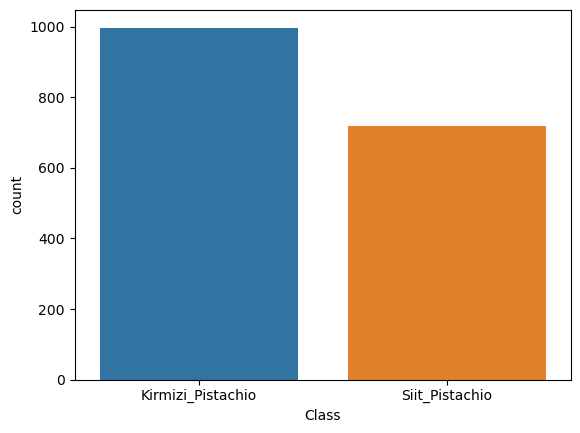

In [54]:
sns.countplot(x='Class', data=df)

<AxesSubplot:>

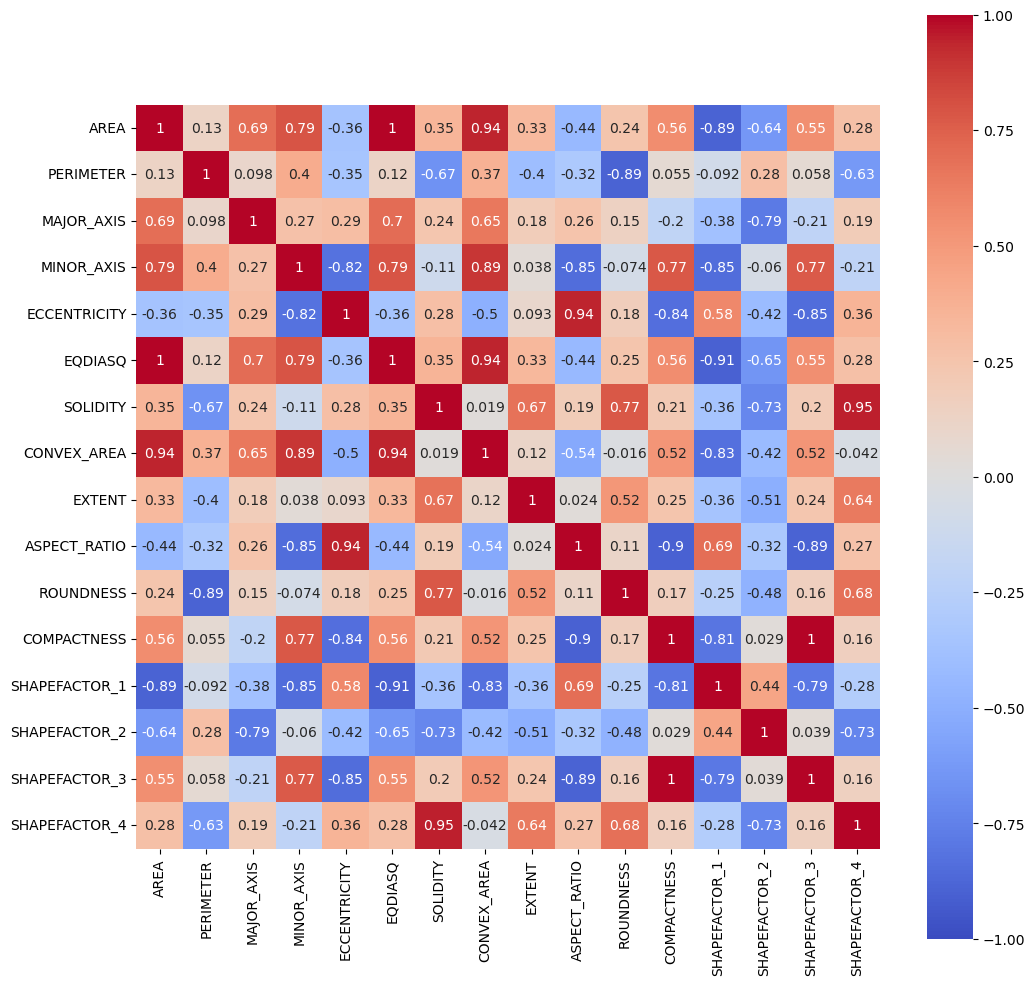

In [55]:
##shows the pearson correlation between the features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# 3. Prepare Data

## a) Data Cleaning

In [56]:
#check the null values 
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

## b) Feature Selection

In [57]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [73]:
def feature_selection(model, n_features):
  sfs = SequentialFeatureSelector(model, n_features_to_select= n_features, direction = 'forward')
  sfs.fit(X_train, y_train)
  X_train_reduced = sfs.transform(X_train)
  X_test_reduced = sfs.transform(X_test)
  return X_train_reduced, X_test_reduced

In [59]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #return the best parameter
  return grid_search.best_params_

# Logistic Regression Pipline

## Intialize the pipline

In [75]:
#find the best C using grid search
model=LogisticRegression()
C_parms={'penalty':['l1','l2'],'C':np.arange(0, 2.0, 0.01)}
best_param(model,C_parms)

c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(

{'C': 0.59, 'penalty': 'l2'}

In [76]:
LR_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LogisticRegression(C=0.59,penalty='l2')) #estimator
])

## Train the model

In [ ]:
#dimensionality reduction using feature selection
X_train_reduced, X_test_reduced = feature_selection(LR_pipline.named_steps['model'], 10)

In [80]:
LR_pipline.fit(X_train_reduced,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=0.59))])

## prediction

In [81]:
#predict testing data
LR_y_pred = LR_pipline.predict(X_test_reduced)

## Model Evaluation

In [82]:
LR_accuracy=accuracy_score(y_test,LR_y_pred)
LR_accuracy

0.8682170542635659

In [83]:
target=['Kirmizi_Pistachio', 'Siit_Pistachio']
LR_CR=classification_report(y_test,LR_y_pred,target_names=target)
print(LR_CR)

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.86      0.92      0.89       293
   Siit_Pistachio       0.88      0.80      0.84       223

         accuracy                           0.87       516
        macro avg       0.87      0.86      0.86       516
     weighted avg       0.87      0.87      0.87       516



# Decision Trees Pipline

## Intialize the pipline

In [84]:
#find the best criteria and max_depth
model1=tree.DecisionTreeClassifier()
criteria_parm={'criterion':['gini','entropy'],'max_depth':list(range(10,70,10))}
best_param(model1,criteria_parm)

{'criterion': 'gini', 'max_depth': 10}

In [85]:
DT_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", tree.DecisionTreeClassifier(criterion='gini',max_depth=10)) #estimator
])

## Train the model

In [86]:
#dimensionality reduction using feature selection
X_train_reduced, X_test_reduced = feature_selection(DT_pipline.named_steps['model'], 10)

In [88]:
DT_pipline.fit(X_train_reduced,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier(max_depth=10))])

## prediction

In [89]:
DT_y_pred=DT_pipline.predict(X_test_reduced)

## Model Evaluation

In [90]:
#calculate the accuaracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.8333333333333334

In [91]:
#Classification report
target=['Kirmizi_Pistachio', 'Siit_Pistachio']
DT_CR=classification_report(y_test,DT_y_pred,target_names=target)
print(DT_CR)

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.85      0.86      0.85       293
   Siit_Pistachio       0.81      0.80      0.81       223

         accuracy                           0.83       516
        macro avg       0.83      0.83      0.83       516
     weighted avg       0.83      0.83      0.83       516



## Visualize the Tree

In [93]:
plt.figure(figsize=(100,100))
feature_names=['AREA','PERIMETER',	'MAJOR_AXIS',	'MINOR_AXIS',	'ECCENTRICITY',	'EQDIASQ',	'SOLIDITY',	'CONVEX_AREA',
               	'EXTENT',	'ASPECT_RATIO',	'ROUNDNESS','COMPACTNESS',	'SHAPEFACTOR_1',	'SHAPEFACTOR_2',	'SHAPEFACTOR_3',	'SHAPEFACTOR_4']
tree.plot_tree(DT_pipline.named_steps['model'],feature_names=feature_names,class_names=target,filled=True,rounded=True)
plt.show()

# KNN Pipline

## Intialize the Pipline

In [96]:
#find the best n_nighbors
model2=KNN()
k_parm={'n_neighbors':list(range(0,10,1))}
best_param(model2,k_parm)

c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\mayaa\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 603, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
V

{'n_neighbors': 8}

In [99]:
KNN_Pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model",KNN(n_neighbors=8)) #estimator
])

## Train the model 

In [100]:
## dimensionality reduction using feature selection
X_train_reduced, X_test_reduced = feature_selection(KNN_Pipline.named_steps['model'], 10)

In [101]:
KNN_Pipline.fit(X_train_reduced,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=8))])

## Prediction

In [102]:
KNN_y_pred=DT_pipline.predict(X_test_reduced)

## Model Evaluation

In [103]:
#calculate the accuaracy
KNN_accuracy=accuracy_score(y_test,KNN_y_pred)
KNN_accuracy

0.5678294573643411

# Ensampling

In [104]:
model1=KNN()
model2=tree.DecisionTreeClassifier()

In [110]:
voting_clf = VotingClassifier(
    estimators=[('knn', model1), ('dt', model2)],
    voting='hard')

In [111]:
voting_clf.fit(X_train, y_train) 

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [113]:
for clf in (model1, model2,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7461240310077519
DecisionTreeClassifier 0.8178294573643411
VotingClassifier 0.7713178294573644


# Ensampling After Feature Selection

In [114]:
#dimensionality reduction using feature selection
X_train_reduced, X_test_reduced = feature_selection(voting_clf, 10)

In [115]:
voting_clf.fit(X_train_reduced, y_train) 

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [117]:
for clf in (model1, model2,voting_clf):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.8488372093023255
DecisionTreeClassifier 0.8391472868217055
VotingClassifier 0.8449612403100775


# Gradient Posting

In [119]:
gb = GradientBoostingClassifier()


In [120]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [122]:
gb_y_pred = gb.predict(X_test)

In [123]:
#calculate the accuaracy
gb_accuracy=accuracy_score(y_test,gb_y_pred)
gb_accuracy

0.872093023255814

# Gradient Posting After Feature Selection

In [124]:
#dimensionality reduction using feature selection
X_train_reduced, X_test_reduced = feature_selection(gb, 10)

In [125]:
gb.fit(X_train_reduced, y_train) 

GradientBoostingClassifier()

In [126]:
gp_y_pred=gb.predict(X_test_reduced)

In [129]:
gp_accuracy=accuracy_score(y_test,gp_y_pred)
gp_accuracy

0.8546511627906976

# Compare between models

In [134]:
data={'Logistic Regression':[LR_accuracy],'Decision Tree':[DT_accuracy],'KNN':[KNN_accuracy],'Voting Classifier Before SFS':[0.77]
      ,'Voting after SFS':[0.84],'Gradient Boosting Before SFS':[gb_accuracy],'Gradient Boosting after SFS':[gp_accuracy]}

In [138]:
result=pd.DataFrame(data)
result

,Logistic Regression,Decision Tree,KNN,Voting Classifier Before SFS,Voting after SFS,Gradient Boosting Before SFS,Gradient Boosting after SFS
0,0.868217,0.833333,0.567829,0.77,0.84,0.872093,0.854651


In [141]:
# Comparison Chart
import plotly.graph_objs as go
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Voting Classifier Before SFS','Voting after SFS','Gradient Boosting Before SFS',
          'Gradient Boosting after SFS']
accuracy_scores = [LR_accuracy,DT_accuracy ,KNN_accuracy ,0.77,0.84,gb_accuracy,gp_accuracy]

fig = go.Figure(data=go.Bar(x=models, y=accuracy_scores))
fig.update_layout(title='Comparison of Models',
                  xaxis=dict(title='Models'),
                  yaxis=dict(title='Accuracy Score'))
fig.show()